# Prototype a more automatic way to parse titles into labels

Let's first figure out the diversity of titles we have.

In [1]:
ORIGINAL_PATH = "data/original"

In [6]:
import os
import pandas as pd

In [27]:
audio_files = [file
               for root, _, files in os.walk(ORIGINAL_PATH)
               for file in files]
audio_files = pd.DataFrame(audio_files, columns=["filename"])
audio_files.shape

(1367, 1)

In [28]:
audio_extensions = (".wav", ".mp3", ".m4a", ".flac")
# get all unique file extensions
set([file.split(".")[-1] for file in audio_files["filename"]])

{'JPG', 'jpg', 'pdf', 'txt', 'wav', 'xls'}

No crazy extensions, let's continue with `WAV` only.

In [29]:
audio_files = audio_files[audio_files["filename"].str.endswith(audio_extensions)]
audio_files.shape

(1331, 1)

In [30]:
audio_files.to_csv("data/audio_files.csv", index=False)

## Experiment with NLTK

In [15]:
import nltk
import stringcase

In [16]:
filename1 = "050_Foley_Footsteps_Concrete_Business_Spin_Turn_Scrape_Special_Distance.wav"
filename2 = "99S LT Impact - Quakerish A.wav"
filename3 = "FOOTSTEP - Metal Board Run Barefoot Male - 37.wav"
filename4 = "Footsteps Grass Scuffs.wav"

FOOTSTEP - Metal Board Run Barefoot Male - 37.wav


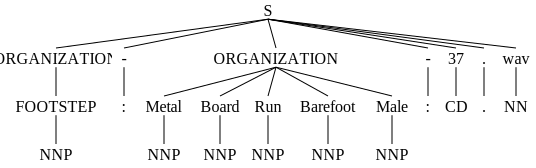

In [17]:
tokens = nltk.wordpunct_tokenize(filename3)
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)
print(filename3)
entities

In [77]:
nltk.ne_chunk(filename2)

IndexError: string index out of range

In [41]:
nltk.wordpunct_tokenize(stringcase.sentencecase(filename1))

['050',
 'foley',
 'footsteps',
 'concrete',
 'business',
 'spin',
 'turn',
 'scrape',
 'special',
 'distance',
 'wav']

In [3]:
from nltk import download

In [75]:
download("brown")
download("wordnet")
download("abc")
download("words")
download("reuters")
download("webtext")

[nltk_data] Downloading package brown to /home/diogoneves/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/diogoneves/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package abc to /home/diogoneves/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package words to /home/diogoneves/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /home/diogoneves/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /home/diogoneves/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [82]:
from nltk.corpus import wordnet, brown, abc, words, reuters, webtext
import re
import string

In [91]:
freqs = nltk.FreqDist([w.lower() for w in abc.words()])
freqs.most_common(10)

[('the', 41634),
 ('.', 27350),
 (',', 26160),
 ('of', 19307),
 ('to', 18671),
 ('and', 14895),
 ('a', 14605),
 ('in', 13356),
 ("'", 10217),
 ('is', 8045)]

In [92]:
filename1 = "050_Foley_Footsteps_Concrete_Business_Spin_Turn_Scrape_Special_Distance.wav"
filename2 = "99S LT Impact - Quakerish A.wav"
filename3 = "FOOTSTEP - Metal Board Run Barefoot Male - 37.wav"
filename4 = "Footsteps Grass Scuffs.wav"

In [103]:
def get_labels(filename: str) -> list[str]:
    name = filename.lower().replace(".wav", "")
    name = re.sub(r"[^a-z\s]", "", name)
    tokens = nltk.wordpunct_tokenize(name)
    frequencies = [freqs.get(t) for t in tokens]
    return [(t, freq) for t, freq in zip(tokens, frequencies) if freq is not None and freq > 5 and len(t) > 2]

In [107]:
get_labels(filename4.replace("_", " "))

[('grass', 38)]

In [73]:
from nltk.metrics.distance  import edit_distance, jaccard_distance
from nltk.util import ngrams

In [74]:
for word in tokens:
    temp = [(jaccard_distance(set(ngrams(word, 2)),
                              set(ngrams(w, 2))),w)
            for w in reuters.words() if w[0]==word[0]]
    print(sorted(temp, key = lambda val:val[0])[0][1])

footed
metal
board
run
bare
male
